## Transfer Learning with ResNet50 for Image Classification 

**Introduction**

* The aim train a model on RESNET architecture on custom Fashon datset with 10 classes

For this purpose, a Residual Neural Network is used: ResNet. The task is to transfer the learning from a ResNet50, trained with Image dataset, to a model that classifies fashion product images.

**Transfer Learning**

For both humans and machines, learning something new takes time and practice. However, it is easier to perform similar tasks to those already learned. As with humans, AI will be able to identify patterns from previous knowledge and apply them to new learning.

If a model is trained on a database, there is no need to re-train the model from scratch to fit a new set of similar data.

Main advantages of Transfer Learning:

* saving resources  

* improving efficiency

* model training facilitation

* saving time


**Residual Network (ResNet)** is a deep learning model that was introduced in 2015 by researchers at Microsoft Research. It is a convolutional neural network (CNN) architecture that is designed to support hundreds or thousands of convolutional layers.

The main innovation of ResNet is the introduction of residual blocks. A residual block is a convolutional block that has a shortcut connection that skips one or more layers. This shortcut connection allows the model to learn the residual mapping between the input and output of the block, rather than having to learn the entire mapping from scratch.

This makes it possible to train ResNets with a large number of layers without the problem of vanishing gradients. Vanishing gradients is a problem that occurs in deep learning models when the gradients of the loss function with respect to the model parameters become very small. This can make it difficult for the model to learn, and can lead to poor performance.

ResNets have been shown to be very effective for a variety of computer vision tasks, including image classification, object detection, and segmentation. They are currently one of the most popular CNN architectures for these tasks.

The basic structure of ResNet is as follows:

The input image is passed through a series of convolutional layers.

The output of these convolutional layers is then passed through a residual block.

The residual block consists of a sequence of convolutional layers, followed by a shortcut connection that skips one or more layers.

The output of the residual block is then added to the output of the convolutional layers.

This process is repeated for a number of residual blocks.

The final output of the ResNet is then passed through a global average pooling layer and a softmax layer to classify the image.

Here are some of the most popular ResNet architectures:

* ResNet-50: This is the most basic ResNet architecture. It has 50 convolutional layers and is a good choice for a variety of computer vision tasks.

* ResNet-101: This is a deeper ResNet architecture with 101 convolutional layers. It is more powerful than ResNet-50, but also requires more training data and computational resources.

* ResNet-152: This is the deepest ResNet architecture. It has 152 convolutional layers and is the most powerful ResNet architecture. However, it also requires the most training data and computational resources.

ResNets are a powerful deep learning architecture that have been shown to be very effective for a variety of computer vision tasks. They are a good choice for any task where you need a deep learning model that can learn complex relationships between the input and output data.


### Step 1 - Librairies installation and import


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers



# Import necessary libraries RESNET50
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input , decode_predictions
from keras.preprocessing import image
from keras.models import Model
import numpy as np


In [2]:

# Define the directory path where the images are located
directory = r"C:\Users\koti0\myntra\dataset"

## Load the Dataset

In [79]:

# Split ratio for validation data
validation_split = 0.2

# Load the image dataset from the directory
train_data = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=64,
    image_size=(224,224),
    validation_split=validation_split,  # Specify the validation split
    subset="training",  # Set subset to both  data to returning test and train data
    seed=2
)
test_data= tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=64,
    image_size=(224,224),
    validation_split=validation_split,  # Specify the validation split
    subset="validation",  # Set subset to both  data to returning test and train data
    seed=2
)



Found 25469 files belonging to 10 classes.
Using 20376 files for training.
Found 25469 files belonging to 10 classes.
Using 5093 files for validation.


In [ ]:
## Visuaize the sample data from Training data

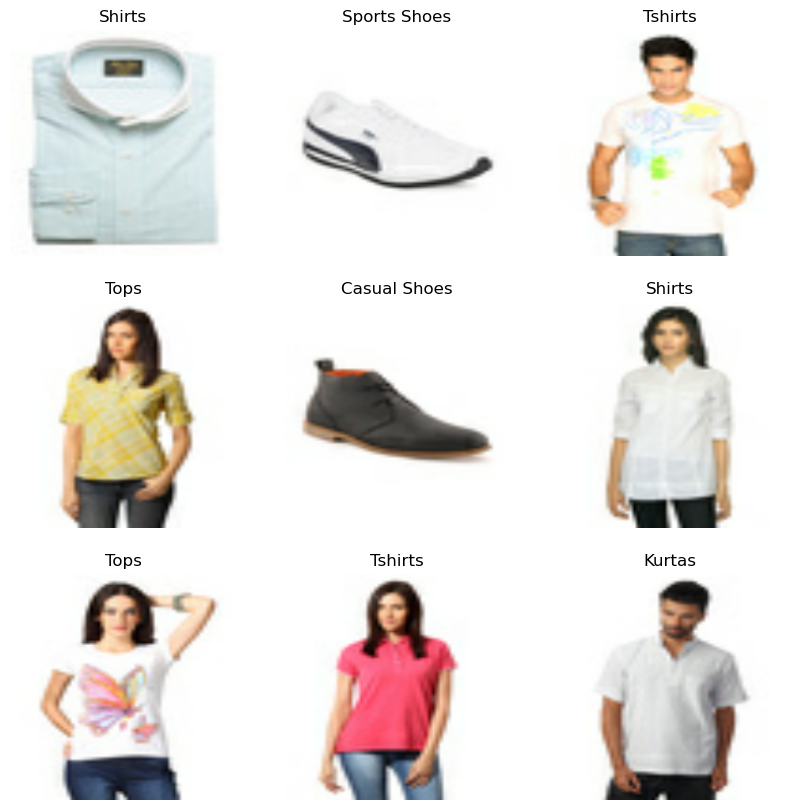

In [94]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(64):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[int(labels[i])])
        plt.axis("off")

## Class Distribution 

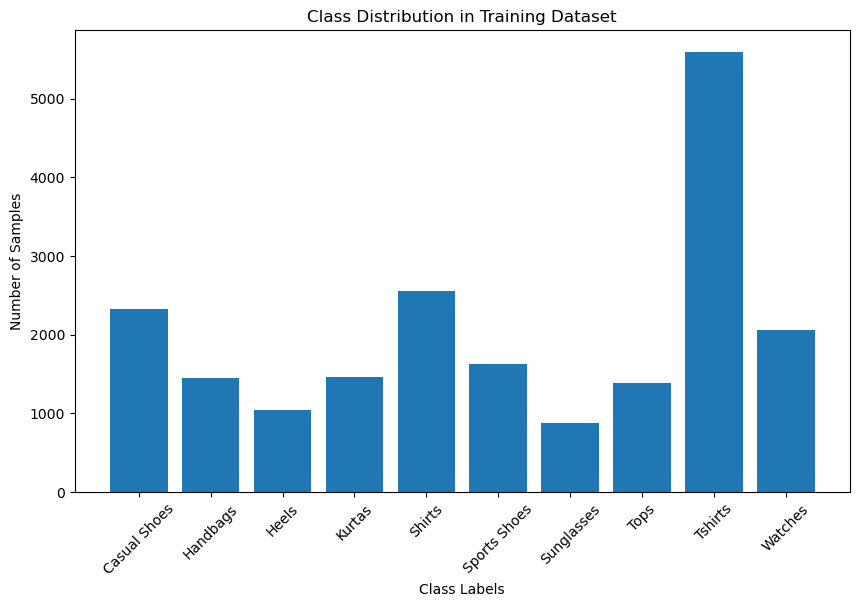

The dataset is not perfectly balanced, but the class distribution is relatively even.


In [60]:
import matplotlib.pyplot as plt

# Get the class names (assuming your dataset generator provides class names)
class_names = train_data.class_names

# Initialize a dictionary to count the number of samples for each class
class_count = {class_name: 0 for class_name in class_names}

# Count the samples in the training dataset
for images, labels in train_data:
    for label in labels.numpy():
        class_name = class_names[label]
        class_count[class_name] += 1

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_count.keys(), class_count.values())
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.xticks(rotation=45)
plt.show()


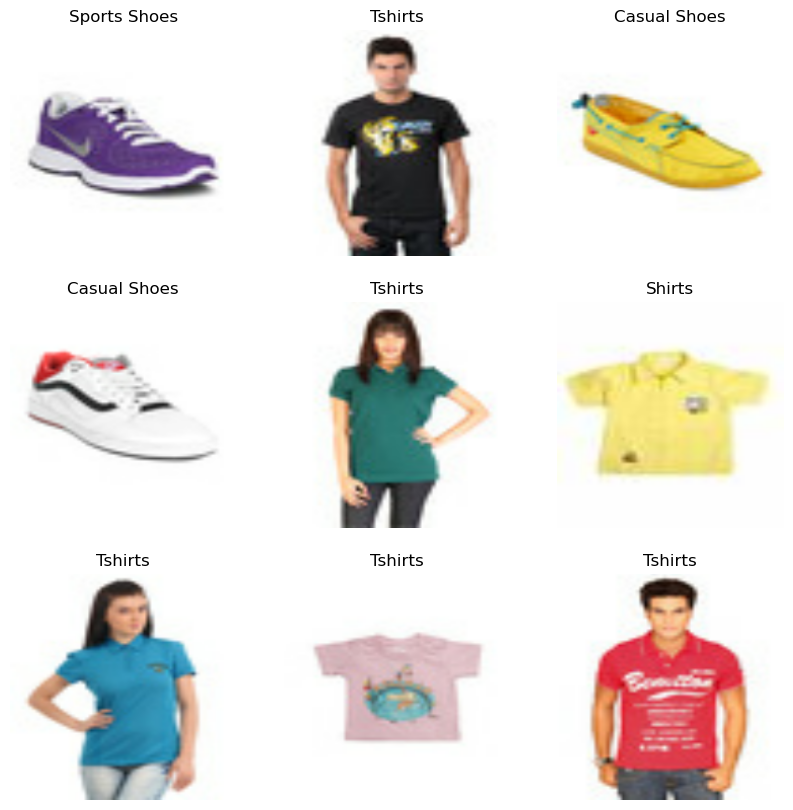

In [95]:
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(65):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(test_data.class_names[int(labels[i])])
        plt.axis("off")

In [72]:

# Normalize the data
def img_process(image, label):
    image = tf.cast(image / 255, tf.float32)
    return image, label

train_data = train_data.map(img_process)
test_data = test_data.map(img_process)

### Basic CNN to evaluate the RESNET50 model and basic model

In [101]:
# Create the CNN model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Replace Flatten with Global Average Pooling
model.add(GlobalAveragePooling2D())

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_9 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 global_average_pooling2d_3   (None, 64)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                      

In [103]:
# Define the directory path to save the best model
save_dir = r"C:\Users\koti0\myntra"  # Replace with the desired save directory

# Define the checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=save_dir + "/basic_best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Define the early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1
)



In [104]:
history=model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[checkpoint_callback, early_stopping_callback]
)


Epoch 1/10
319/319 [==============================] - ETA: 0s - loss: 1.8804 - accuracy: 0.3471
Epoch 1: val_loss improved from inf to 1.92480, saving model to C:\Users\koti0\myntra\basic_best_model.h5
319/319 [==============================] - 826s 3s/step - loss: 1.8804 - accuracy: 0.3471 - val_loss: 1.9248 - val_accuracy: 0.3577
Epoch 2/10
319/319 [==============================] - ETA: 0s - loss: 1.7225 - accuracy: 0.4016
Epoch 2: val_loss did not improve from 1.92480
319/319 [==============================] - 836s 3s/step - loss: 1.7225 - accuracy: 0.4016 - val_loss: 2.6273 - val_accuracy: 0.2075
Epoch 3/10
319/319 [==============================] - ETA: 0s - loss: 1.6411 - accuracy: 0.4298
Epoch 3: val_loss did not improve from 1.92480
319/319 [==============================] - 843s 3s/step - loss: 1.6411 - accuracy: 0.4298 - val_loss: 2.0543 - val_accuracy: 0.3259
Epoch 4/10
319/319 [==============================] - ETA: 0s - loss: 1.5895 - accuracy: 0.4461
Epoch 4: val_loss di

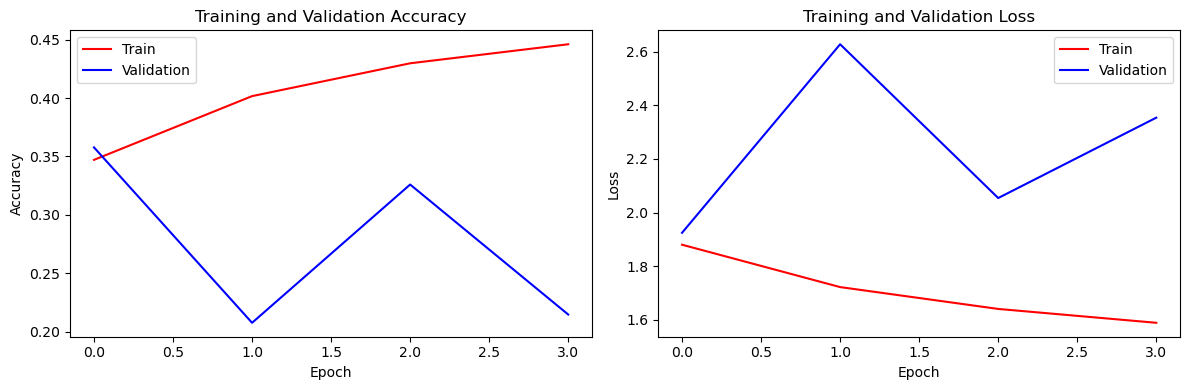

In [106]:
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: Training and Validation Accuracy
axes[0].plot(history.history['accuracy'], color='red', label='Train')
axes[0].plot(history.history['val_accuracy'], color='blue', label='Validation')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

# Subplot 2: Training and Validation Loss
axes[1].plot(history.history['loss'], color='red', label='Train')
axes[1].plot(history.history['val_loss'], color='blue', label='Validation')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


In [173]:


def get_labels(model, test_data):
    """
    Extracts actual and predicted labels from a model's predictions on test data.

    Args:
    - model: The trained deep learning model.
    - test_data: A TensorFlow dataset containing test images and labels.

    Returns:
    - actual_labels: NumPy array of actual labels.
    - predicted_labels: NumPy array of predicted labels.
    """

    actual_labels = []
    predicted_labels = []

    # Iterate over the test data and extract the labels
    for images, labels in test_data:
        actual_labels.extend(labels.numpy())
        predictions = model.predict(images, verbose=0)  # Get model predictions for the batch
        predicted_labels.extend(np.argmax(predictions, axis=1))

    # Convert the labels lists to NumPy arrays
    actual_labels = np.array(actual_labels)
    predicted_labels = np.array(predicted_labels)

    return actual_labels, predicted_labels

actual_labels, predicted_labels = get_actual_and_predicted_labels(model, test_data)


In [174]:
actual_labels,predicted_labels=get_labels(model,test_data)

In [152]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

def evaluate_model(actual_labels, predicted_labels, class_names):
    # Accuracy
    accuracy = accuracy_score(actual_labels, predicted_labels)
    print("Accuracy:", accuracy)

    # Confusion Matrix
    confusion = confusion_matrix(actual_labels, predicted_labels)
    print("Confusion Matrix:\n", confusion)

    # Classification Report
    #classification_rep = classification_report(actual_labels, predicted_labels, target_names=class_names)
    #print("Classification Report:\n", classification_rep)

    # Precision
    precision = precision_score(actual_labels, predicted_labels, average="micro")
    print("Precision:", precision)

    # Recall
    recall = recall_score(actual_labels, predicted_labels, average="micro")
    print("Recall:", recall)

    # F1 Score
    f1 = f1_score(actual_labels, predicted_labels, average="micro")
    print("F1 Score:", f1)


In [175]:
evaluate_model(actual_labels,predicted_labels,test_data.class_names)

Accuracy: 0.21460828588258393
Confusion Matrix:
 [[  0   0   0   0  71   0   0 441  11   0]
 [  0   0   0   0 101   0   0 186  26   0]
 [  0   0   0   0   9   0   0 264   0   0]
 [  0   0   0   0  68   0   0 283  25   0]
 [  0   0   0   0 364   0   0 281  14   0]
 [  0   0   0   0  54   0   0 342  13   0]
 [  0   0   0   0   0   0   0 198   0   0]
 [  0   0   0   0  68   0   0 272  34   0]
 [  0   0   0   0 367   0   0 676 438   0]
 [  0   0   0   0 175   0   0 237  56  19]]
Precision: 0.21460828588258393
Recall: 0.21460828588258393
F1 Score: 0.21460828588258393


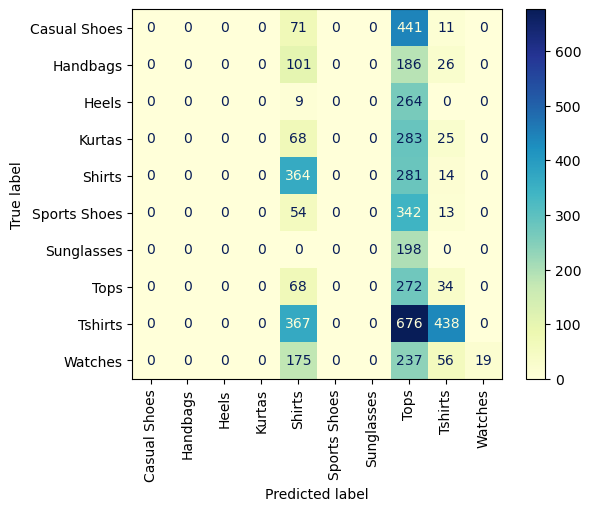

In [176]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion=confusion_matrix(actual_labels,predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
disp.plot(cmap="YlGnBu",xticks_rotation='vertical')
plt.show()

In [ ]:
# predict the 

# Load the image using OpenCV
image_path = "path/to/image.jpg"  # Replace with the actual image path
image = cv2.imread(image_path)

# Preprocess the image for prediction
image = cv2.resize(image, (256, 256))  # Resize the image to the desired size
image = image / 255.0  # Normalize the pixel values to the range [0, 1]
image = tf.expand_dims(image, axis=0)  # Add an extra dimension for batch

# Perform prediction using your model
predictions = model.predict(image)

# Get the predicted class
predicted_class =train_data.class_names[tf.argmax(predictions[0])]

# Print the predicted class
print("Predicted class:", predicted_class)


In [ ]:
# Import necessary libraries
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input , decode_predictions
from keras.preprocessing import image
from keras.models import Model
import numpy as np

In [45]:


# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [53]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(10, activation='softmax')(x)
resnet_model = Model(inputs = resnet_50.input, outputs = predictions)

In [54]:
resnet_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [55]:
# Define the directory path to save the best model
save_dir = r"C:\Users\koti0\myntra"  # Replace with the desired save directory

# Define the checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=save_dir + "/best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Define the early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1
)

In [56]:

# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 64
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

In [57]:
# launch the training
model_history = trainModel(model = resnet_model, epochs = 10, optimizer = "Adam")


Epoch 1/10
319/319 [==============================] - ETA: 0s - loss: 0.9084 - accuracy: 0.6705
Epoch 1: val_loss improved from inf to 0.36660, saving model to C:\Users\koti0\myntra\best_model.h5
319/319 [==============================] - 1092s 3s/step - loss: 0.9084 - accuracy: 0.6705 - val_loss: 0.3666 - val_accuracy: 0.8669
Epoch 2/10
319/319 [==============================] - ETA: 0s - loss: 0.4954 - accuracy: 0.8165
Epoch 2: val_loss improved from 0.36660 to 0.30625, saving model to C:\Users\koti0\myntra\best_model.h5
319/319 [==============================] - 968s 3s/step - loss: 0.4954 - accuracy: 0.8165 - val_loss: 0.3063 - val_accuracy: 0.8777
Epoch 3/10
319/319 [==============================] - ETA: 0s - loss: 0.4143 - accuracy: 0.8484
Epoch 3: val_loss improved from 0.30625 to 0.28892, saving model to C:\Users\koti0\myntra\best_model.h5
319/319 [==============================] - 1071s 3s/step - loss: 0.4143 - accuracy: 0.8484 - val_loss: 0.2889 - val_accuracy: 0.8842
Epoch 

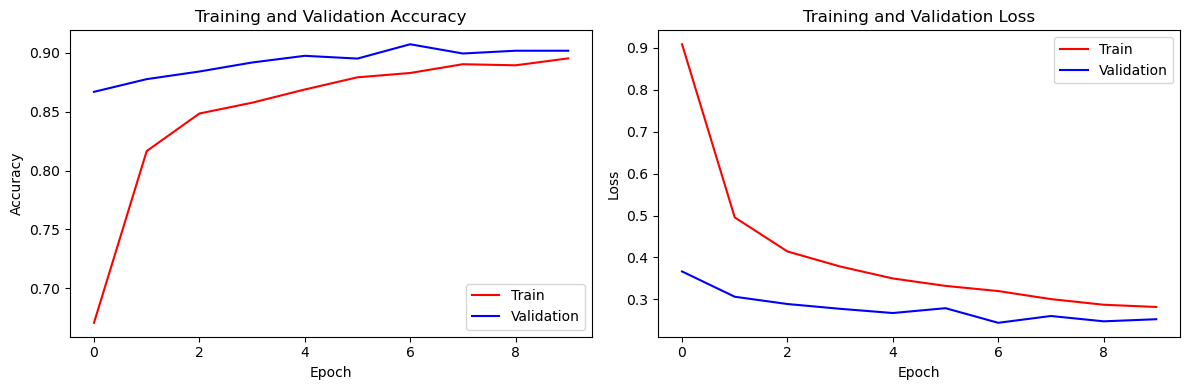

In [141]:
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Subplot 1: Training and Validation Accuracy
axes[0].plot(model_history.history['accuracy'], color='red', label='Train')
axes[0].plot(model_history.history['val_accuracy'], color='blue', label='Validation')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].legend()

# Subplot 2: Training and Validation Loss
axes[1].plot(model_history.history['loss'], color='red', label='Train')
axes[1].plot(model_history.history['val_loss'], color='blue', label='Validation')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


## Evaluating the  RESNET50 Finetuned Model

In [143]:
actual_labels, predicted_labels = get_labels(resnet_model, test_data)
evaluate_model(actual_labels, predicted_labels, class_names)

Accuracy: 0.9018260357353229
Confusion Matrix:
 [[ 449    1   18    0    0   55    0    0    0    0]
 [   0  309    0    1    0    0    0    1    2    0]
 [   4    0  267    0    0    2    0    0    0    0]
 [   0    0    0  367    4    0    0    4    1    0]
 [   0    0    0    6  624    0    0   20    9    0]
 [  70    1    3    0    1  334    0    0    0    0]
 [   0    0    0    0    0    0  198    0    0    0]
 [   0    2    0   50   15    0    0  254   52    1]
 [   0    2    0    7   37    1    0  125 1307    2]
 [   0    1    0    1    0    0    0    1    0  484]]
Precision: 0.9018260357353229
Recall: 0.9018260357353229
F1 Score: 0.9018260357353229


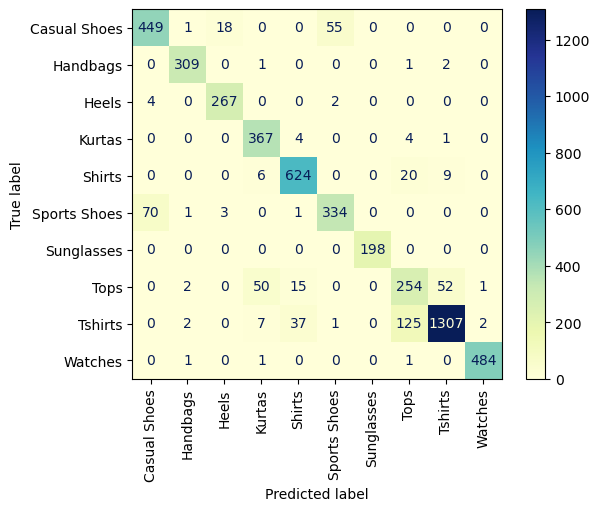

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion=confusion_matrix(actual_labels,predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
disp.plot(cmap="YlGnBu",xticks_rotation='vertical')
plt.show()

In [169]:
def predict_class(image, model, class_names):
    # Load the image using OpenCV
    #image = cv2.imread(image_path)

    # Preprocess the image for prediction
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image2 = cv2.resize(image, (224, 224))  # Resize the image to the desired size
    image2 = image2 / 255.0  # Normalize the pixel values to the range [0, 1]
    image2 = tf.expand_dims(image2, axis=0)  # Add an extra dimension for batch

    # Perform prediction using the model
    predictions = model.predict(image2)

    # Get the predicted class
    predicted_class = class_names[tf.argmax(predictions[0])]

    # Return the predicted class
    return predicted_class,image

1/1 [==============================] - 0s 280ms/step


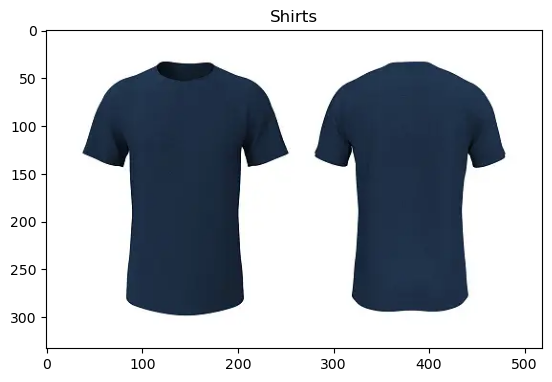

In [171]:
image = cv2.imread(r"C:\Users\koti0\OneDrive\Desktop\istockphoto-1328049157-170667a.webp")
predicted_class, image = predict_class(image=image, model=resnet_model, class_names=train_data.class_names)
plt.imshow(image)
plt.title(predicted_class)
plt.show()